In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Activation, Input
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
import gzip,cPickle,sys
from matplotlib.pyplot import imshow
from keras.preprocessing.image import ImageDataGenerator

np.random.seed(1337)
%matplotlib inline

/Users/mnpappo/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
batch_size = 32
num_classes = 10
epochs = 100
img_width, img_height = 28, 28

In [3]:
train_data_dir = 'data/train/bn_numerals'
validation_data_dir = 'data/validation/bn_numerals'
nb_train_samples = 1560
nb_validation_samples = 390

In [4]:
if K.image_data_format() == 'channels_first':
    input_shape = (1, img_width, img_height)
else:
    input_shape = (img_width, img_height, 1)

In [5]:
img_input = Input(shape=input_shape)

# Conv Block 1
x = Conv2D(16, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
x = Conv2D(32, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

# Conv Block 2
x = Conv2D(32, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

# Classification block
x = Flatten(name='flatten')(x)
x = Dense(32, activation='relu', name='fc')(x)
x = Dense(num_classes, activation='softmax', name='predictions')(x)

model = Model(img_input, x)

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 28, 28, 16)        160       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 28, 28, 32)        4640      
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 14, 14, 32)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 14, 14, 32)        9248      
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 14, 14, 64)        18496     
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 7, 7, 64)          0         
__________

In [7]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.5,
    width_shift_range=0.2,
    height_shift_range=0.2
)

In [8]:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./ 255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    color_mode = "grayscale",
    shuffle = True,
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    color_mode = "grayscale",
    shuffle = True,
    batch_size=batch_size,
    class_mode='categorical')

Found 15600 images belonging to 10 classes.
Found 4148 images belonging to 10 classes.


In [10]:
#tb = keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=True, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None)

In [11]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    #callbacks=[tb],
)


Epoch 1/100
48/48 [==============================] - 6s 134ms/step - loss: 1.8279 - acc: 0.3568 - val_loss: 0.9017 - val_acc: 0.7396
Epoch 2/100
48/48 [==============================] - 5s 108ms/step - loss: 1.0835 - acc: 0.6341 - val_loss: 0.4724 - val_acc: 0.8438
Epoch 3/100
48/48 [==============================] - 5s 114ms/step - loss: 0.7791 - acc: 0.7428 - val_loss: 0.4314 - val_acc: 0.8516
Epoch 4/100
48/48 [==============================] - 6s 126ms/step - loss: 0.6977 - acc: 0.7689 - val_loss: 0.4077 - val_acc: 0.8620
Epoch 5/100
48/48 [==============================] - 6s 124ms/step - loss: 0.6579 - acc: 0.7943 - val_loss: 0.3206 - val_acc: 0.8932
Epoch 6/100
48/48 [==============================] - 6s 123ms/step - loss: 0.5542 - acc: 0.8125 - val_loss: 0.4017 - val_acc: 0.8542
Epoch 7/100
48/48 [==============================] - 6s 117ms/step - loss: 0.5217 - acc: 0.8288 - val_loss: 0.3547 - val_acc: 0.8984
Epoch 8/100
48/48 [==============================] - 6s 123ms/step - 

48/48 [==============================] - 6s 115ms/step - loss: 0.1707 - acc: 0.9473 - val_loss: 0.1066 - val_acc: 0.9714
Epoch 63/100
48/48 [==============================] - 6s 120ms/step - loss: 0.1764 - acc: 0.9401 - val_loss: 0.0955 - val_acc: 0.9792
Epoch 64/100
48/48 [==============================] - 6s 115ms/step - loss: 0.1637 - acc: 0.9473 - val_loss: 0.1260 - val_acc: 0.9688
Epoch 65/100
48/48 [==============================] - 6s 118ms/step - loss: 0.1385 - acc: 0.9531 - val_loss: 0.1642 - val_acc: 0.9462
Epoch 66/100
48/48 [==============================] - 6s 117ms/step - loss: 0.1697 - acc: 0.9538 - val_loss: 0.0881 - val_acc: 0.9740
Epoch 67/100
48/48 [==============================] - 6s 122ms/step - loss: 0.1839 - acc: 0.9434 - val_loss: 0.0844 - val_acc: 0.9766
Epoch 68/100
48/48 [==============================] - 6s 119ms/step - loss: 0.1527 - acc: 0.9570 - val_loss: 0.0819 - val_acc: 0.9818
Epoch 69/100
48/48 [==============================] - 6s 119ms/step - loss:

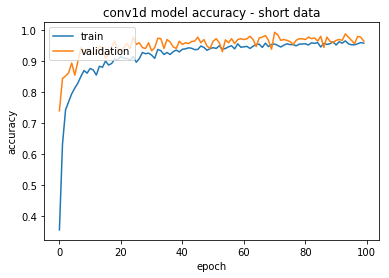

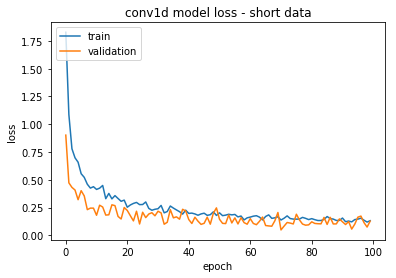

In [12]:
import matplotlib.pyplot as plt

# accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('conv1d model accuracy - short data')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('conv1d model loss - short data')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [13]:
#saving model
#model.save_weights('bn_digit.h5')